In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Review GuessingShoeSize

In [125]:
def averaging_dice(n_rolls=10, n_draws=5000, func=np.mean, axis=1):
    '''Calculates value of specified function of rolling a dice n_rolls times replicated n_draws'''
    dice = np.random.randint(1,7,(n_draws,n_rolls))
    return func(dice, axis=axis)

In [229]:
Games = averaging_dice(20, 5000 ,np.mean, 1)

0.26


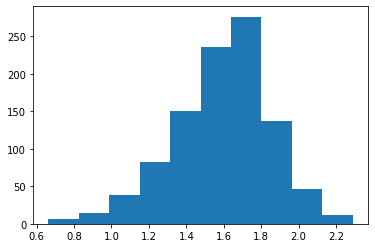

In [131]:
print(np.round(np.std(Games),2))
plt.hist(Games);

Find the law by how much the std goes down, if you keep increasing the n_rolls 

In [145]:
#std_results = []
#for i in range(100):
#    result_std = np.std(averaging_dice(i))
#    std_results.append(result_std)

In [146]:
StdevSampleMean = np.zeros(100)

for i in np.arange(100):
    StdevSampleMean[i] = np.std(averaging_dice(i+1))

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_18265/1004833152.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/(np.sqrt(np.arange(100))));


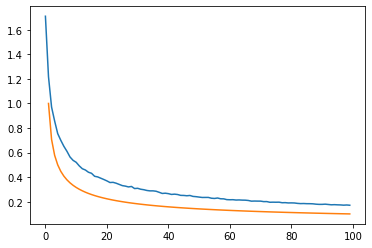

In [164]:
plt.plot(StdevSampleMean);
plt.plot(1/(np.sqrt(np.arange(100))));

Diminishing returns ~1/np.sqrt(n)

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_18265/3275059696.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/np.sqrt(n_rolls),1./(np.sqrt(np.arange(100))))


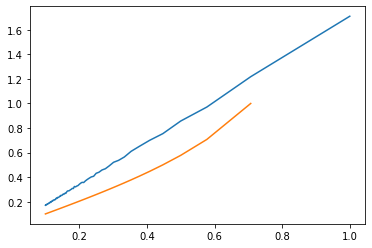

In [174]:
n_rolls = np.arange(1,101)
plt.plot(1/np.sqrt(n_rolls), StdevSampleMean);
plt.plot(1/np.sqrt(n_rolls),1./(np.sqrt(np.arange(100))))

# Bootstrapping 

In [263]:
#np.random.seed(23)

dice = np.zeros((5000,20))

dice[0,:] = np.random.randint(1,7,20)

games_bs = np.array([np.mean(np.random.choice(dice[0,:], 20)) for i in dice])


In [307]:
#dices= np.zeros((5000,20))
#dices[0,:] = np.random.randint(1,7,20)
#dices[1:,:] = [np.random.choice(dices_test[0,:], 20) for i in range(5000-1)]
#games_bs = np.mean(dices, axis=1)

In [308]:
games_bs.shape

(5000,)

3.4918099999999996 3.39705
0.3829809706760898 0.4034312797738916


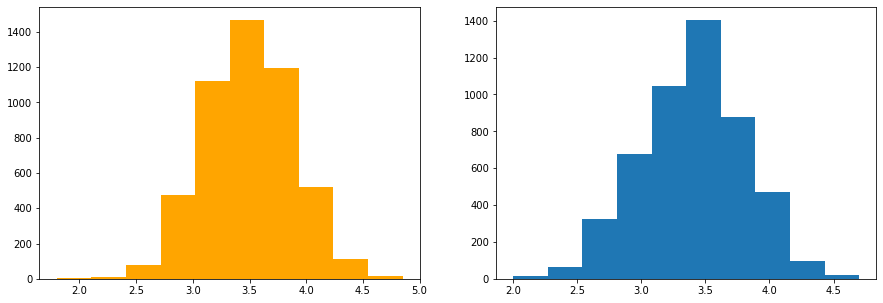

In [309]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.hist(Games, color="orange"); 
ax2.hist(games_bs);
print(np.mean(Games), np.mean(games_bs))
print(np.std(Games), np.std(games_bs))

- Standard deviation for original and bootstrapped sample is nearly identical
- Mean deviates because mean of sample (first row) was 3.75 --> mean of bs_sample centers around this mean

## Hypothesis testing

In [310]:
no_rolls=100

np.random.seed(320)

dice2 = np.zeros((5000,no_rolls))

dice2[0,:] = np.random.randint(1,6,no_rolls)

games_bs2 = np.array([np.mean(np.random.choice(dice2[0,:], no_rolls)) for i in dice])

3.4918099999999996 3.090838
0.3829809706760898 0.131473486893746


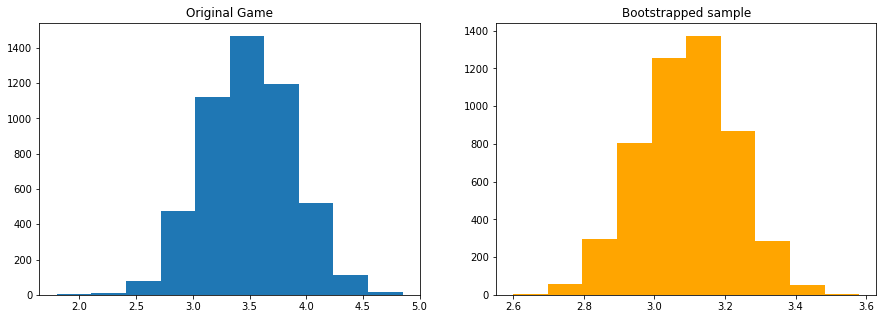

In [311]:
fig, (ax11,ax21) = plt.subplots(1,2, figsize=(15,5))
ax11.hist(Games); 
ax11.set_title("Original Game")
ax21.hist(games_bs2,color="orange");
ax21.set_title("Bootstrapped sample")
print(np.mean(Games), np.mean(games_bs2))
print(np.std(Games), np.std(games_bs2))

Task: Proove that the mean of your sample is not 3.5

In [298]:
conf_inv = np.quantile(games_bs2, (0.025,0.975)) #(np.percentile(games_bs2, 2.5), np.percentile(games_bs2, 97.5))
conf_inv

array([2.83975, 3.35   ])

**Answer:**
- We are 95% certain, that the mean is between 2.8 and 3.35 --> therefore we refuse the claim 
- Better/ more accurate decision if n increases (because std lowers)